# Regression with Scikit Learn - Machine Learning with Python


In [11]:

import pandas as pd
import numpy as np

In [13]:
medical_df = pd.read_csv('insurance.csv')


In [15]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [17]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [19]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Exploratory Analysis and Visualization

Let's explore the data by visualizing the distribution of values in some columns of the dataset, and the relationships between "charges" and other columns.

We ar using libraries likeMatplotlib, Seaborn and Plotly for visualization.

In [22]:

import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns



###  Age

Age is a numeric column. The minimum age in the dataset is 18 and the maximum age is 64. Thus, we can visualize the distribution of age using a histogram
with 47 bins (one for each year) and a box plot. We'll use plotly to make the chart interactive, but you can create similar charts using Seaborn.

In [25]:
medical_df.age.describe()


count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

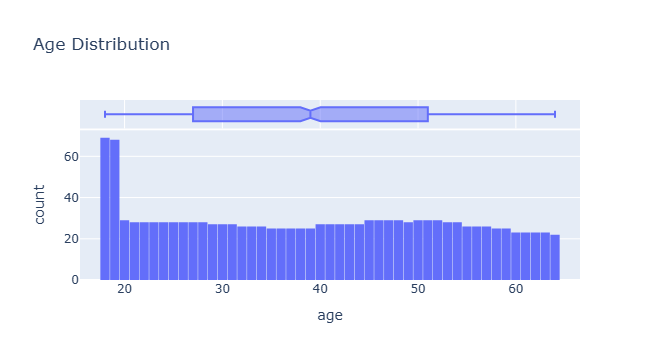

In [29]:
fig = px.histogram(medical_df,
                   x = 'age',
                   marginal='box',
                   nbins=47,
                   title='Age Distribution')
fig.update_layout(bargap=0.05)
fig.show()

### Body Mass Index

Let's look at the distribution of BMI (Body Mass Index) of customers, using a histogram and box plot.

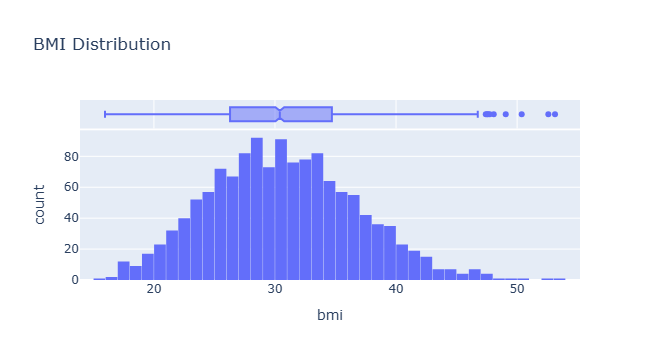

In [31]:
fig = px.histogram(medical_df,
                   x = 'bmi',
                   marginal='box',
                   #nbins=6,  used to allocte the no of bars
                   title='BMI Distribution')
fig.update_layout(bargap=0.03)
fig.show()

The measurements of body mass index seem to form a [Gaussian distribution](https://en.wikipedia.org/wiki/Normal_distribution) centered around the value 30, with a few outliers towards the right. Here's how BMI values can be interpreted ([source](https://study.com/academy/lesson/what-is-bmi-definition-formula-calculation.html)):

![](https://i.imgur.com/lh23OiY.jpg)


### Charges

Let's visualize the distribution of "charges" i.e. the annual medical charges for customers. This is the column we're trying to predict. Let's also use the categorical column "smoker" to distinguish the charges for smokers and non-smokers.

<Axes: xlabel='charges', ylabel='Count'>

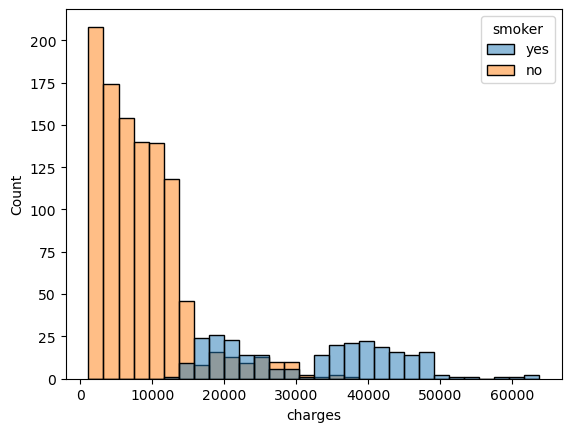

In [33]:
sns.histplot(medical_df, x='charges',hue='smoker')

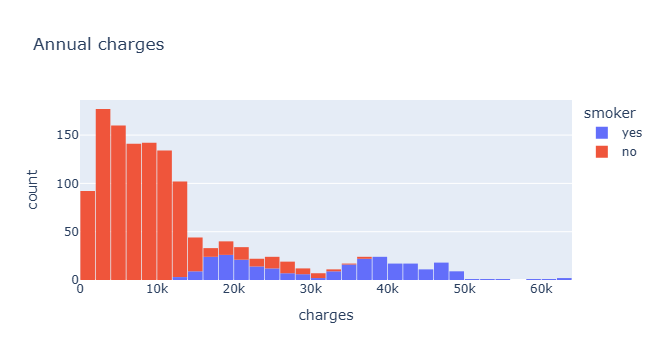

In [35]:
fig = px.histogram(medical_df,
             x='charges',

             title = 'Annual charges',
             color='smoker')
fig.update_layout(bargap=0.05)
fig.show()

We can make the following observations from the above graph:

* Most people spend less than \\$10,000 on medical bills each year. Only a few people have very high medical costs, maybe because of accidents, serious sickness, or inherited health problems.
* Smokers tend to have much higher medical expenses than non-smokers. On average, non-smokers spend around \\$7,300, while smokers spend about \\$35,000.


### Smoker


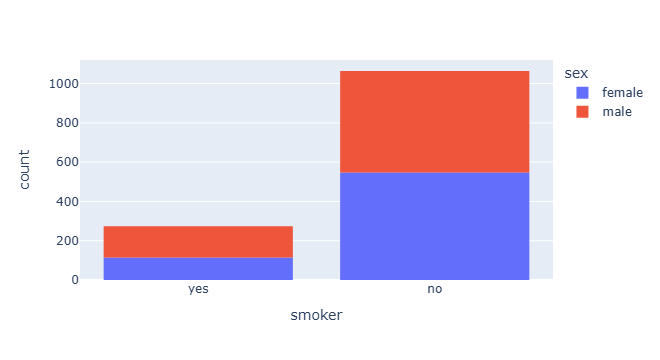

In [37]:
px.histogram(medical_df, x='smoker',color='sex')

It appears that 20% of customers have reported that they smoke. Can you verify whether this matches the national average, assuming the data was collected in 2010? We can also see that smoking appears a more common habit among males. Can you verify this?



### Age and Charges


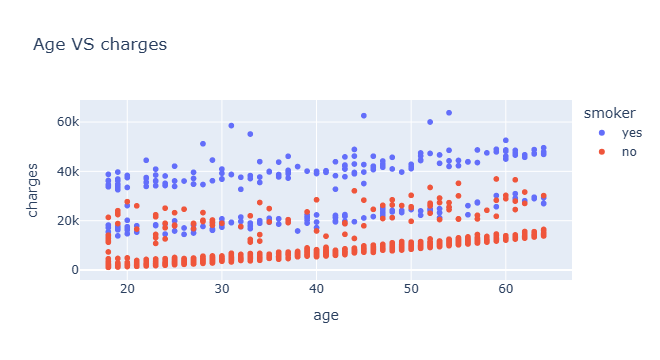

In [40]:
px.scatter(medical_df,
           x ='age',
           y = 'charges',
           color='smoker',
           title = 'Age VS charges')

We can understand the following from the chart:

- In general, medical charges go up as people get older, which makes sense. But there's a lot of difference in charges even among people of the same age. So, age alone doesn't decide how much someone will pay.

- There are three clear groups (or "clusters") of people in the chart:

  1. The first and biggest group is likely made up of **healthy non-smokers**. They usually have **lower medical costs**.
  
  2. The second group is a mix of **smokers and non-smokers**. This might actually be two overlapping groups: **non-smokers who have health problems** and **smokers who are still fairly healthy**.
  
  3. The last group only includes **smokers with serious health issues**. Their medical costs are the **highest**, possibly due to problems caused or worsened by smoking.


### BMI and Charges


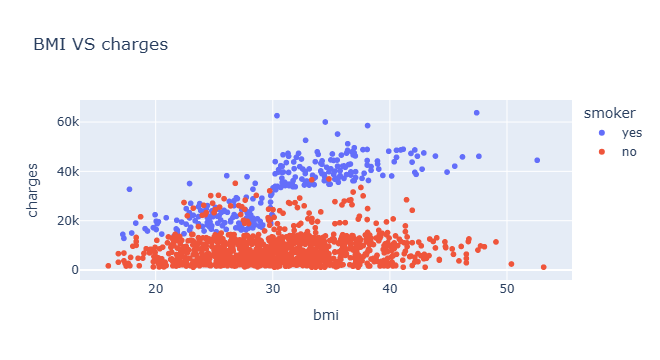

In [42]:
px.scatter(medical_df,
           x = 'bmi',
           y ='charges',
           color = 'smoker',
           title = 'BMI VS charges')

From the chart above, we can see:

- For **non-smokers** (red dots), medical charges stay **low** even when BMI increases. So, a higher BMI alone doesn't mean higher costs for non-smokers.
- For **smokers** (blue dots), especially those with a **BMI over 30**, the medical charges are **much higher**. This suggests that being overweight and smoking together can lead to serious health problems and higher bills.

Other insights:

- There's a clear **separation between smokers and non-smokers**. Most of the **higher medical costs** belong to **smokers**.
- Some smokers with even normal or slightly high BMI still have **very high charges**, which could mean that smoking is a strong risk factor by itself.
- Non-smokers generally have charges under **$20,000**, while smokers often go well over that amount.

In short, **smoking increases medical costs**, and this effect is even stronger for people who are also **overweight**.


### Corelation

In [44]:
medical_df.charges.corr(medical_df.age)

0.29900819333064765

In [46]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362892

In [48]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [50]:
#To compute the correlation for categorical columns, they must first be converted into numeric columns.

smoker_val = {'no':0,'yes':1}
smoker_num = medical_df.smoker.map(smoker_val)
medical_df.charges.corr(smoker_num)

0.7872514304984772




Here's how correlation coefficients can be interpreted ([source](https://statisticsbyjim.com/basics/correlations)):

* **Strength**: The greater the absolute value of the correlation coefficient, the stronger the relationship.

    * The extreme values of -1 and 1 indicate a perfectly linear relationship where a change in one variable is accompanied by a perfectly consistent change in the other. For these relationships, all of the data points fall on a line. In practice, you won’t see either type of perfect relationship.

    * A coefficient of zero represents no linear relationship. As one variable increases, there is no tendency in the other variable to either increase or decrease.
    
    * When the value is in-between 0 and +1/-1, there is a relationship, but the points don’t all fall on a line. As r approaches -1 or 1, the strength of the relationship increases and the data points tend to fall closer to a line.


* **Direction**: The sign of the correlation coefficient represents the direction of the relationship.

    * Positive coefficients indicate that when the value of one variable increases, the value of the other variable also tends to increase. Positive relationships produce an upward slope on a scatterplot.
    
    * Negative coefficients represent cases when the value of one variable increases, the value of the other variable tends to decrease. Negative relationships produce a downward slope.

Here's the same relationship expressed visually ([source](https://www.cuemath.com/data/how-to-calculate-correlation-coefficient/)):

<img src="https://i.imgur.com/3XUpDlw.png" width="360">

Pandas dataframes also provide a `.corr` method to compute the correlation coefficients between all pairs of numeric columns.

## Linear Regression using a Single Feature

We now know that the "smoker" and "age" columns have the strongest correlation with "charges". Let's try to find a way of estimating the value of "charges" using the value of "age" for non-smokers. First, let's create a data frame containing just the data for non-smokers.

In [54]:
# To create a dataframe containing just the data for non strikers.
non_smoker_df = medical_df[medical_df.smoker == 'no']
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


<Axes: xlabel='age', ylabel='charges'>

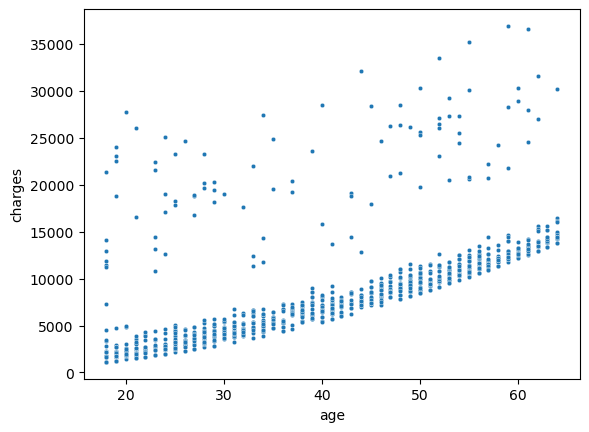

In [56]:
sns.scatterplot(data=non_smoker_df, x='age',y='charges',s=10)


We want to find a straight line that best fits a set of data points. This line helps us make predictions.

The equation of a line is:\[
y = wx + b
\]

Where:
- \( y \) is the predicted value (e.g., charges)
- \( x \) is the input value (e.g., age)
- \( w \) is the **slope** of the line (how much \( y \) changes with \( x \))
- \( b \) is the **intercept** (the value of \( y \) when \( x = 0 \))

Once we find the best values for \( w \) and \( b \), we can use this line to estimate charges for any given age.


### Model

In the above case, the x-axis shows **"age"** and the y-axis shows **"charges"**. Thus, we're assuming the following relationship between the two:
$charges = w \times age + b$

We'll try to determine \( w \) and \( b \) for the line that best fits the data.

* This technique is called _linear regression_, and we call the above equation a _linear regression model_, because it models the relationship between "age" and "charges" as a straight line.
* The numbers \( w \) and \( b \) are called the _parameters_ or _weights_ of the model.
* The values in the "age" column of the dataset are called the _inputs_ to the model and the values in the "charges" column are called _targets_.

Let's define a helper function `estimate_charges`, to compute charges given `age`, `w`, and `b`.


In [64]:
# Our first Model:
def estimate_charges(age, w, b):
  return w * age + b

In [66]:
w = 50
b = 100

In [68]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)

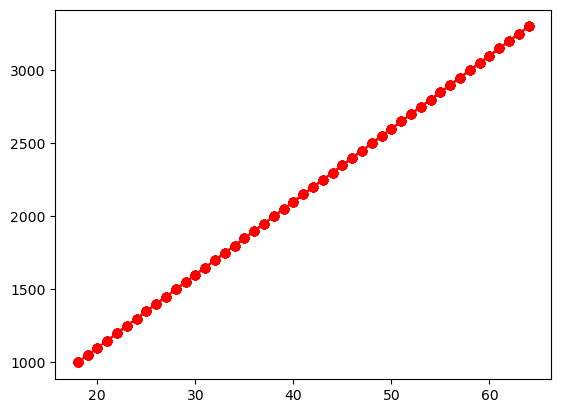

In [72]:
# Estimated charges using a line graph.

plt.plot(ages,estimated_charges, 'r-o')

As expected, the points lie on a straight line.

This suggests that a linear model is a good fit for the data.  
We can also overlay the fitted line on the actual data points to visually see how well our _model_ fits the _data_.


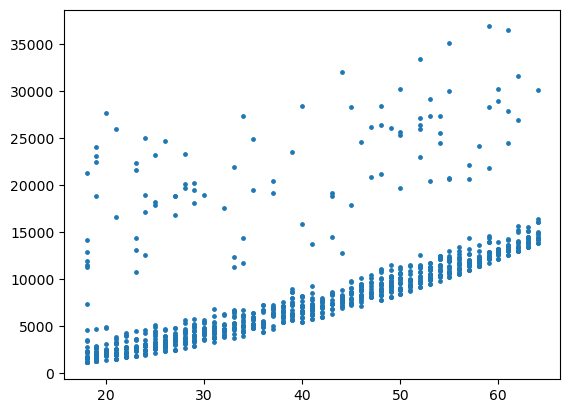

In [77]:
# ACTUAL GRAPH
target = non_smoker_df.charges
plt.scatter(ages,target,s=6)

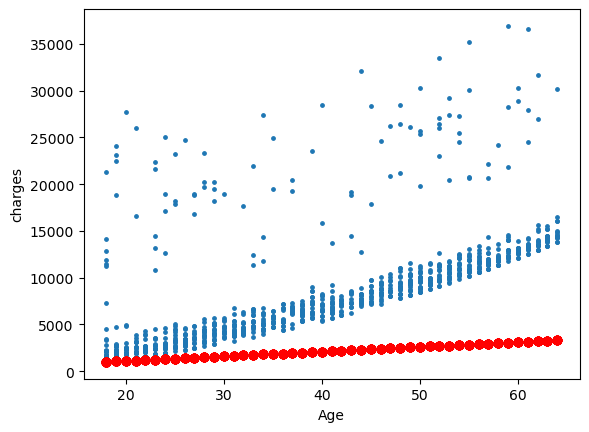

In [79]:
target = non_smoker_df.charges
plt.plot(ages,estimated_charges, 'r-o',alpha=0.7)
plt.scatter(ages,target,s=6)
plt.xlabel('Age');
plt.ylabel("charges");


Clearly, our estimates are quite poor and the line does not "fit" the data well. As the red line should lie in Between of Blue One.
Let's try different values of $w$ and $b$ to move the line around and improve the fit.

Let's define a helper function `try_parameters` which takes `w` and `b` as inputs and creates the plot of actual data points with the corresponding estimated line.


In [82]:
def try_parameters(w, b):
  ages = non_smoker_df.age
  target = non_smoker_df.charges

  estimated_charges = estimate_charges(ages, w, b)

  plt.plot(ages,estimated_charges, 'r-o',alpha=0.7)
  plt.scatter(ages,target,s=6)
  plt.xlabel('Age');
  plt.ylabel("charges");

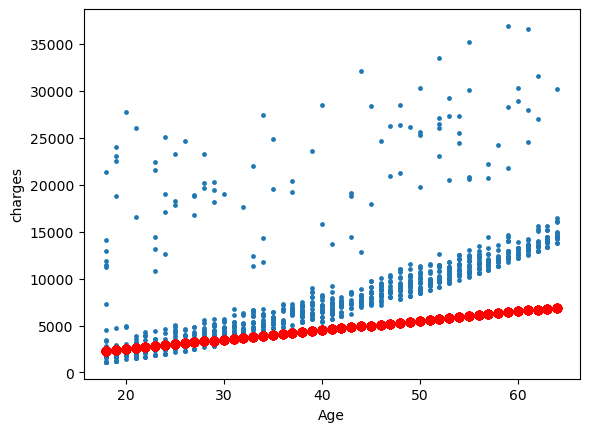

In [84]:
try_parameters(100, 500)

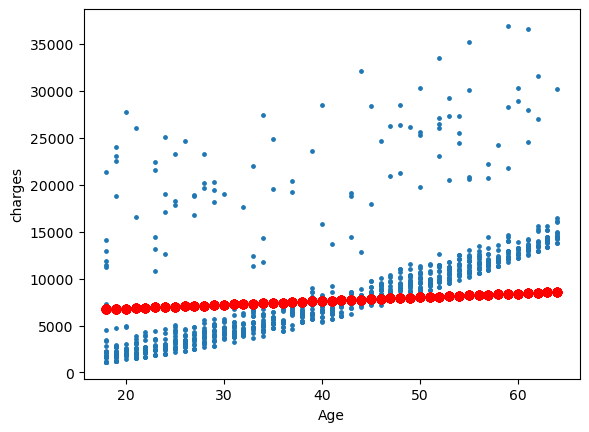

In [86]:
try_parameters(40, 6000)

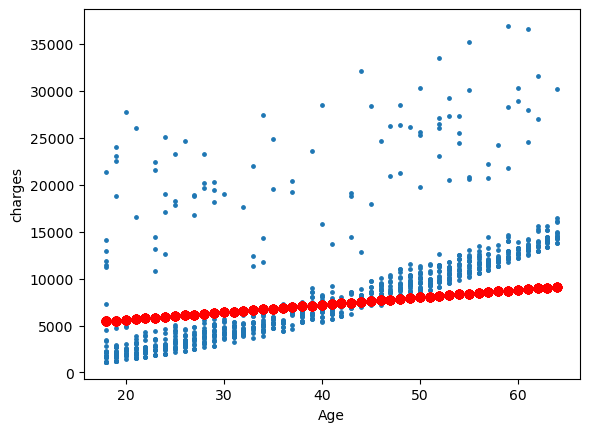

In [101]:
try_parameters(80, 4000)

# --- here we are giving parameters we are not using machine learning techniques 

### Loss/Cost Function

We can compare our model's predictions with the actual targets using the following method:

* Calculate the difference between the targets and predictions (this difference is called the **residual**).
* Square all elements of the difference to remove negative values.
* Calculate the average of these squared values.
* Take the square root of the result.

The result is a single number, known as the **root mean squared error (RMSE)**. This helps us measure how well the model's predictions match the actual data.

The above description can be stated mathematically as follows:

<img src="https://i.imgur.com/WCanPkA.png" width="360">

Geometrically, the residuals can be visualized as follows:

<img src="https://i.imgur.com/ll3NL80.png" width="420">

In [103]:
#function to compute the RMSE.

def rmse(targets, predictions):
  return np.sqrt(np.mean(np.square(targets - predictions)))

In [105]:
w = 50
b = 100

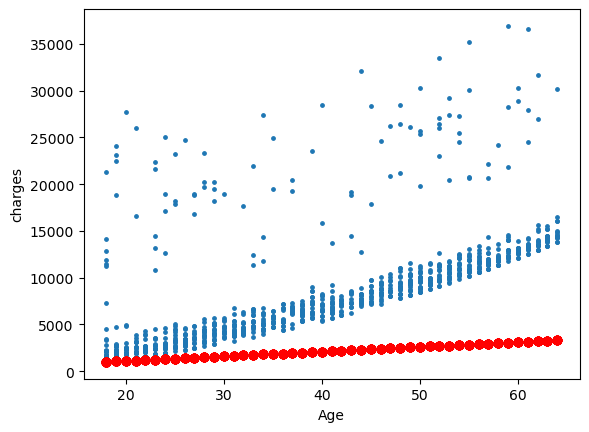

In [107]:
try_parameters(w, b)

In [110]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)


In [112]:
rmse(targets, predicted)

8461.949562575493

In [118]:
medical_df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [120]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)

    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);

    loss = rmse(targets, predictions)
    print("RMSE LOSS:" ,loss)

RMSE LOSS: 8461.949562575493


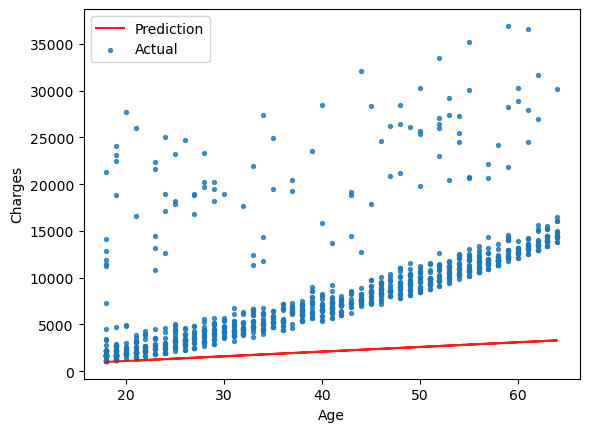

In [122]:
try_parameters(50, 100)

### Linear Regression using Scikit-learn
* Use of library scikit

In [125]:
from sklearn.linear_model import LinearRegression

In [127]:
model = LinearRegression()
model

LinearRegression()

Next, we can use the `fit` method of the model to find the best fit line for the inputs and targets.

In [130]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('Inputs.Shape:',inputs.shape)
print('Targets.Shape:',targets.shape)

Inputs.Shape: (1064, 1)
Targets.Shape: (1064,)


In [132]:
model.fit(inputs, targets)

LinearRegression()

We can now make predictions using the model. Let's try predicting the charges for the ages 23, 50 and 60.

In [138]:
model.predict(np.array([[23],
                       [50],
                       [60]]))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855, 11271.02508499, 13943.51421331])

In [140]:
# Let compute the predictions for the entire set of inputs

inputs

,age
1,18
2,28
3,33
4,32
5,31
...,...
1332,52
1333,50
1334,18
1335,18


In [142]:
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

Seems like our prediction is off by $4000 on average, which is not too bad considering the fact that there are several outliers.

In [145]:
model.intercept_

-2091.4205565650827

In [147]:
model.coef_

array([267.24891283])

RMSE LOSS: 4662.505766636395


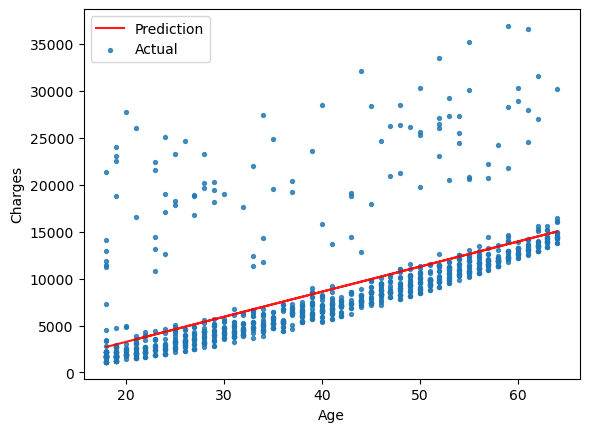

In [149]:
# Let's visualize the line created by the above parameters.

try_parameters(model.coef_, model.intercept_)

In [163]:
# create inputs and targets
inputs, targets = non_smoker_df[['age']], non_smoker_df['charges']

# create and train model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# compute the loss
loss = rmse(targets, predictions)
print('Loss: ',loss)

Loss:  4662.505766636395
